In [1]:
import numpy as np
import pyvista as pv
import torch
import matplotlib.pyplot as plt
import sys
sys.path.append("./")  # 确保根目录在 sys.path 中
import src.simulator_ver1 as simulator
import src.postProcess as PostProcess
import src.particleGenerator as particleGenerator
from scipy import interpolate
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

In [ ]:

react_table = np.array([[[0.7, -1, 0, 0], [0.0, 0,  0, 0], [1.0, 0, 0, 0]],
                        [[0.8, -1, 1, 0], [0.0, 0,  0, 0], [0.0, 0, 0, 0]],
                        [[1.0,  0, 0, 0], [1.0, 0, -2, 0], [1.0, 0, 0, 0]]])


In [ ]:
simulator.reaction.react_table = react_table

In [ ]:
simulator.reaction.react_table 

In [2]:
# simple
film = np.zeros((20, 100, 140, 2))

bottom = 100
height = 104

density = 10

center = 50

film[:, :45, bottom:height, 1] = density
film[:, 55:, bottom:height, 1] = density
# film[:, :, 0:bottom, :] = 0
film[:, :, 0:bottom, 0] = density # bottom
# film[:, :, 0:bottom, 1] = 0 # bottom
# film[:, :, 0:bottom, 2] = 0 # bottom

In [ ]:
# simple
film = np.zeros((20, 100, 140, 3))

bottom = 100
height = 104

density = 10

center = 50

film[:, :45, bottom:height, 2] = density
film[:, 55:, bottom:height, 2] = density
# film[:, :, 0:bottom, :] = 0
film[:, :, 0:bottom, 0] = density # bottom
# film[:, :, 0:bottom, 1] = 0 # bottom
# film[:, :, 0:bottom, 2] = 0 # bottom

In [ ]:
PostProcess.PostProcess(film, colors=['dimgray', 'yellow', 'cyan'])

In [ ]:
# geom = pv.Box()

# Mask = torch.Tensor(film[:, :, :, 2]!=0).to_sparse()
# Mask = Mask.indices().numpy().T

# SiClx = torch.Tensor(film[:, :, :, 1]!=0).to_sparse()
# SiClx = SiClx.indices().numpy().T

# Si = torch.Tensor(film[:, :, :,0]!=0).to_sparse()
# Si = Si.indices().numpy().T

# Maskmesh = pv.PolyData(Mask)
# Maskmesh["radius"] = np.ones(Mask.shape[0])*0.5

# SiClxmesh = pv.PolyData(SiClx)
# SiClxmesh["radius"] = np.ones(SiClx.shape[0])*0.5

# Simesh = pv.PolyData(Si)
# Simesh["radius"] = np.ones(Si.shape[0])*0.5

# # Progress bar is a new feature on master branch
# Maskglyphed = Maskmesh.glyph(scale="radius", geom=geom) # progress_bar=True)
# SiClxglyphed = SiClxmesh.glyph(scale="radius", geom=geom) # progress_bar=True)
# Siglyphed = Simesh.glyph(scale="radius", geom=geom) # progress_bar=True)

# p = pv.Plotter()
# p.add_mesh(Maskglyphed, color='cyan')
# # p.add_mesh(SiClxglyphed, color='yellow')
# p.add_mesh(Siglyphed, color='dimgray')
# p.enable_eye_dome_lighting()
# p.show()

In [3]:
etchfilm = film
center = film.shape[1]/2

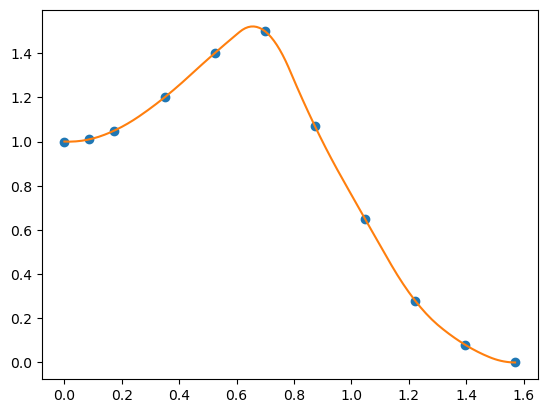

In [4]:
yield_hist = np.array([[1.0, 1.01, 1.05,  1.2,  1.4,  1.5, 1.07, 0.65, 0.28, 0.08,  0, \
                        0.08, 0.28,0.65,  1.07, 1.5, 1.4, 1.2, 1.05, 1.01, 1.0 ], \
                        [  0,  5,   10,   20,   30,   40,   50,   60,   70,   80, 90, \
                          100, 110, 120, 130, 140, 150, 160, 170, 175, 180]])
yield_hist[1] *= np.pi/180
yield_func = interpolate.interp1d(yield_hist[1], yield_hist[0], kind='quadratic')

xnew = np.arange(0, np.pi/2, 0.01)
# xnew = np.array([])
ynew = yield_func(xnew)   # use interpolation function returned by `interp1d`
plt.plot(yield_hist[1, :11], yield_hist[0, :11], 'o', xnew, ynew, '-')
plt.show()

In [5]:
logname = 'simulator_ver1_1203'
etchingPoint = np.array([center, center, bottom-30])
depoPoint = np.array([center, center, bottom-30])
density = 10
center_with_direction=np.array([[int(etchfilm.shape[0]/2),int(etchfilm.shape[1]/2),150]])
range3D=np.array([[0, etchfilm.shape[0], 0, etchfilm.shape[1], 0, etchfilm.shape[2]]])
InOrOut=[1]
# yield_hist=np.array([None])
yield_hist = yield_hist
maskTop=40, 
maskBottom=98, 
maskStep=10, 
maskCenter=[int(etchfilm.shape[0]/2), int(etchfilm.shape[1]/2)]
backup=False
mirrorGap=5
offset_distence = 0.8
reaction_type=False
celllength=1e-5
kdtreeN=2
filmKDTree=np.array([[2, 0, -1], [3, 0, -1]]) # 1 for depo -1 for etching
# filmKDTree=np.array([[2, 1], [3, 1]])
weightDepo=0.2
weightEtching = 0.2
tstep=1e-5
substrateTop=bottom
testEtch = simulator.etching(
                    etchingPoint,depoPoint,
                    density, center_with_direction, 
                    range3D, InOrOut, yield_hist,
                    maskTop, maskBottom, maskStep, maskCenter,backup, 
                    mirrorGap,offset_distence,
                    reaction_type,
                    celllength, kdtreeN, filmKDTree,weightDepo,weightEtching, tstep,
                    substrateTop, logname)

In [6]:
# particle_list = [[int(1e3), 1, 'maxwell', 50], [int(1e3), 2, 'undown', 40]]
particle_list = [[int(1e6), 1, 'maxwell', 50]]
vel_matrix = particleGenerator.vel_generator(particle_list)

In [7]:
vel_matrix.shape

(1000000, 5)

In [8]:
vel_matrix[:10]

array([[-4.69689210e-01, -7.95996514e-01, -3.81813561e-01,
         5.00000000e+01,  1.00000000e+00],
       [-4.52348303e-01, -3.56037133e-01, -8.17691001e-01,
         5.00000000e+01,  1.00000000e+00],
       [-1.09762480e-01,  4.07807629e-01, -9.06446433e-01,
         5.00000000e+01,  1.00000000e+00],
       [-1.49674034e-01,  1.68357565e-01, -9.74296369e-01,
         5.00000000e+01,  1.00000000e+00],
       [-9.95636533e-01,  1.92065623e-02, -9.13181338e-02,
         5.00000000e+01,  1.00000000e+00],
       [ 8.55085485e-01, -2.14017479e-03, -5.18482626e-01,
         5.00000000e+01,  1.00000000e+00],
       [-1.53988290e-01, -3.37089761e-01, -9.28793895e-01,
         5.00000000e+01,  1.00000000e+00],
       [-8.28496949e-01,  3.65892594e-01, -4.23928549e-01,
         5.00000000e+01,  1.00000000e+00],
       [ 7.40869075e-01,  8.77801636e-02, -6.65888622e-01,
         5.00000000e+01,  1.00000000e+00],
       [ 1.80964014e-01, -1.72077841e-01, -9.68318771e-01,
         5.00000000e+01

In [12]:
testEtch.parcel

array([[3.66560259e-05, 6.96082851e-04, 9.56581783e-04, ...,
        2.00000000e-01, 5.00000000e+01, 1.00000000e+00],
       [1.29060500e-04, 1.52812255e-04, 9.65852038e-04, ...,
        2.00000000e-01, 5.00000000e+01, 1.00000000e+00],
       [1.94545367e-04, 2.49634887e-04, 9.23852309e-04, ...,
        2.00000000e-01, 5.00000000e+01, 1.00000000e+00],
       ...,
       [1.60386681e-04, 9.80294546e-04, 1.39491237e-03, ...,
        2.00000000e-01, 5.00000000e+01, 1.00000000e+00],
       [1.84824234e-04, 6.38308569e-04, 1.38144758e-03, ...,
        2.00000000e-01, 5.00000000e+01, 1.00000000e+00],
       [1.16714717e-04, 8.36898116e-04, 1.38837357e-03, ...,
        2.00000000e-01, 5.00000000e+01, 1.00000000e+00]])

In [9]:
cicle = 100
celllength=1e-5
parcel = np.array([[95*celllength, 95*celllength, 159*celllength, 0, 0, 1, 95, 95, 159, 0.2, 50, 0]])
step1 = testEtch.inputParticle(etchfilm, parcel,'etching', vel_matrix, int(1e4), int(1e5), int(1e6), 2)

(30, 110, 140)


particle input:   0%|                                                     | 0.00/100 [00:21<?, ?B/s]


KeyboardInterrupt: 

In [ ]:
etchfilm.shape

In [11]:
etchfilm[10, 10, :, 1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

In [10]:
PostProcess.PostProcess(etchfilm, colors=['dimgray', 'yellow', 'cyan'])

c:\Users\urcs049\AppData\Local\anaconda3\Lib\site-packages\pyvista\core\utilities\points.py:55: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(


Widget(value='<iframe src="http://localhost:50313/index.html?ui=P_0x21f1f532c30_0&reconnect=auto" class="pyvis…

In [ ]:
pos1e4_data = testEtch.planes
point_cloud = pv.PolyData(pos1e4_data[:, 3:6])
vectors = pos1e4_data[:, :3]

point_cloud['vectors'] = vectors
arrows = point_cloud.glyph(
    orient='vectors',
    scale=10000,
    factor=3,
)

# Display the arrowscyan


plotter = pv.Plotter()
plotter.add_mesh(point_cloud, color='cyan', point_size=5.0, render_points_as_spheres=True)
# plotter.add_mesh(sphere, show_edges=True, opacity=0.5, color="w")
plotter.add_mesh(arrows, color='lightblue')
# # plotter.add_point_labels([point_cloud.center,], ['Center',],
# #                          point_color='yellow', point_size=20)
plotter.show_grid()
plotter.show()